
# Introduction to data analysis and visualisation using python toolkits

## Introduction

This tutorial will go through how to use the pandas toolkit using python code. We will work with a sample dataset from the [GapMinder project](https://www.gapminder.org/), an independent educational non-proﬁt. 

This tutorial also requires some basic understanding of programming using python. Here is a good introductory tutorial: https://swcarpentry.github.io/python-novice-inflammation/

## Note: DO NOT use this platform for confidential/patient data
For real analyses, install python and run it locally. This platform is mainly used for demonstration and learning.

This is a good guide to installing python on your computer https://youtu.be/9mAmZIRfJBs

## Tutorial
Let's get started!!!


First, let's download the file containing the data. We are downloading the data file from Google Drive to the virtual machine running this code. It should be saved to `gapminder.csv`.

In [115]:
!gdown --id 1AOvLj0YcjWokZE958-3OxNk5k8U1ZhLg -O ./gapminder.csv

Downloading...
From: https://drive.google.com/uc?id=1AOvLj0YcjWokZE958-3OxNk5k8U1ZhLg
To: /content/gapminder.csv
100% 88.8k/88.8k [00:00<00:00, 32.2MB/s]


# Importing data

We will now use a data analysis toolkit called [pandas](https://pandas.pydata.org/) to read and work with our data. 

Let's use the `read_csv` function to read the data from our downloaded .csv file and print it out: 

In [116]:
# importing modules that we will use later on
import pandas as pd                  # working with data in tables

# create a variable called df, and use the read_csv command to import the data
df = pd.read_csv('gapminder.csv', index_col=['year'])

# print a summary of the df DataFrame
df

country continent  lifeExp  population   gdpPercap
year                                                        
1952  Afghanistan      Asia   28.801     8425333  779.445314
1957  Afghanistan      Asia   30.332     9240934  820.853030
1962  Afghanistan      Asia   31.997    10267083  853.100710
1967  Afghanistan      Asia   34.020    11537966  836.197138
1972  Afghanistan      Asia   36.088    13079460  739.981106
...           ...       ...      ...         ...         ...
1987     Zimbabwe    Africa   62.351     9216418  706.157306
1992     Zimbabwe    Africa   60.377    10704340  693.420786
1997     Zimbabwe    Africa   46.809    11404948  792.449960
2002     Zimbabwe    Africa   39.989    11926563  672.038623
2007     Zimbabwe    Africa   43.487    12311143  469.709298

[1704 rows x 5 columns]

Pandas handles data in structures called **DataFrames**. These have:
- rows and columns
- an **index** for each row
- a **label** for each column

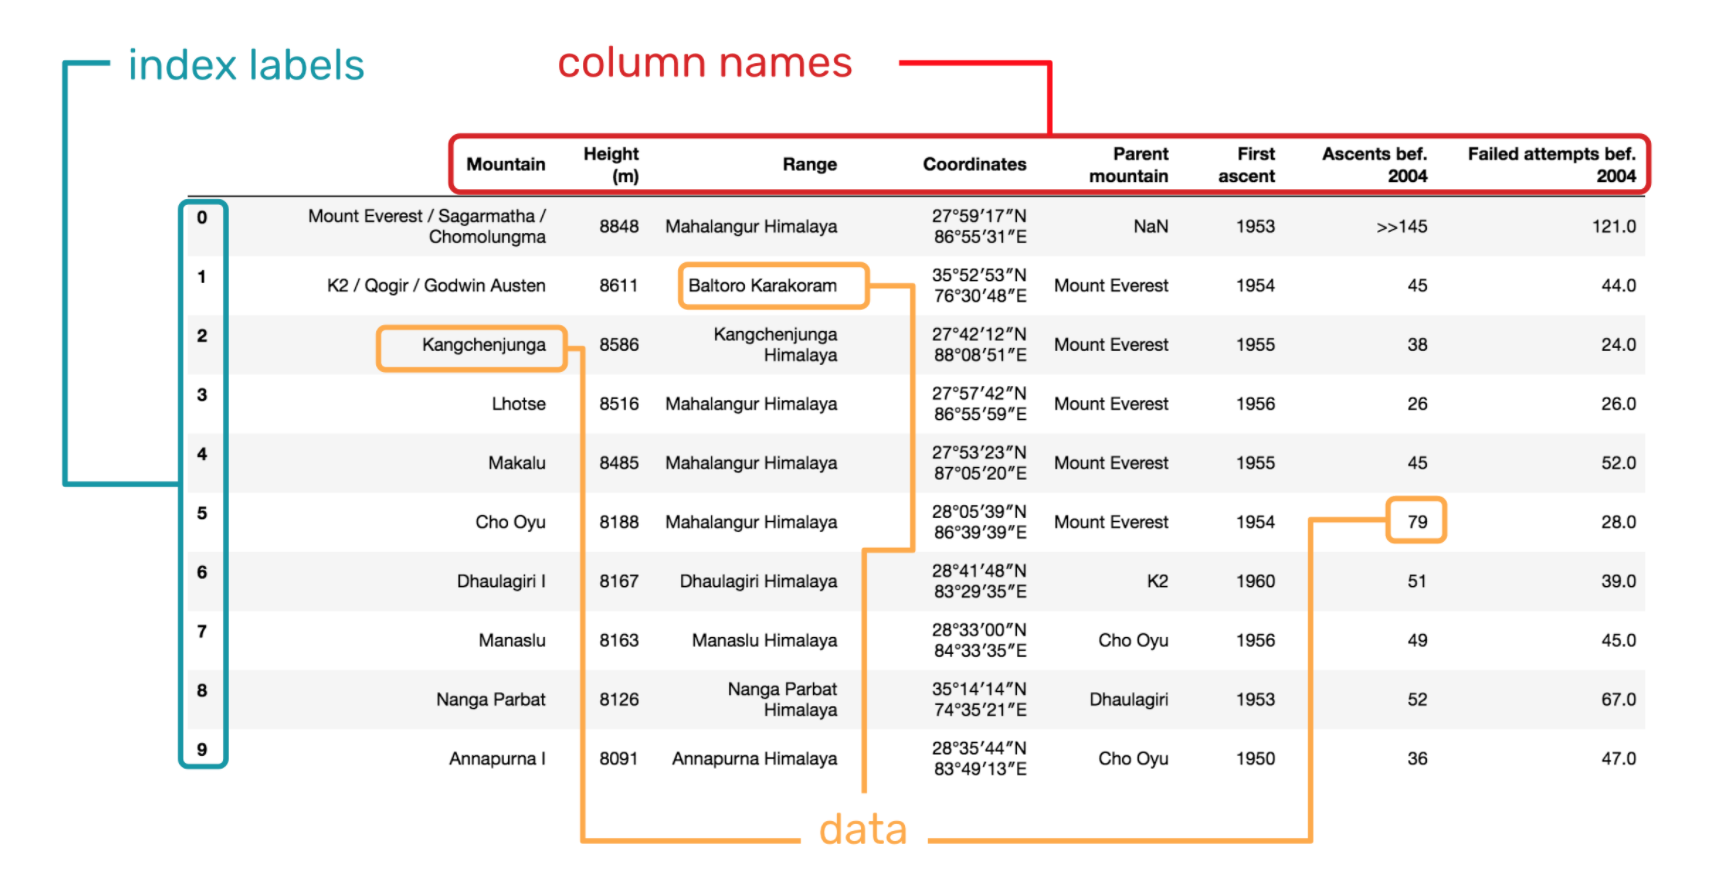


These are similar to Excel spreadsheets, but you can control them in a precise and powerful way.

Pandas also has functions to import data from excel, json, html, R, SPSS and other formats.

Here is the online documentation page for pandas input/output functions : https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

# Selecting values in a DataFrame

## Selecting rows
Here we select the rows corresponding to Afghanistan using the .loc function.

In [44]:
afg = df.loc[df['country'] == 'Afghanistan']

afg

country continent  lifeExp  population   gdpPercap
year                                                        
1952  Afghanistan      Asia   28.801     8425333  779.445314
1957  Afghanistan      Asia   30.332     9240934  820.853030
1962  Afghanistan      Asia   31.997    10267083  853.100710
1967  Afghanistan      Asia   34.020    11537966  836.197138
1972  Afghanistan      Asia   36.088    13079460  739.981106
1977  Afghanistan      Asia   38.438    14880372  786.113360
1982  Afghanistan      Asia   39.854    12881816  978.011439
1987  Afghanistan      Asia   40.822    13867957  852.395945
1992  Afghanistan      Asia   41.674    16317921  649.341395
1997  Afghanistan      Asia   41.763    22227415  635.341351
2002  Afghanistan      Asia   42.129    25268405  726.734055
2007  Afghanistan      Asia   43.828    31889923  974.580338

We can construct more complex criteria with which to select parts of our data. 

What if you are interested in Asian countries at timepoints where the population was greater than 10 million?

In [45]:
asia50 = df.loc[(df.population > 10000000) & (df.continent == "Asia")]

asia50

country continent  lifeExp  population    gdpPercap
year                                                         
1962  Afghanistan      Asia   31.997    10267083   853.100710
1967  Afghanistan      Asia   34.020    11537966   836.197138
1972  Afghanistan      Asia   36.088    13079460   739.981106
1977  Afghanistan      Asia   38.438    14880372   786.113360
1982  Afghanistan      Asia   39.854    12881816   978.011439
...           ...       ...      ...         ...          ...
1987  Yemen, Rep.      Asia   52.922    11219340  1971.741538
1992  Yemen, Rep.      Asia   55.599    13367997  1879.496673
1997  Yemen, Rep.      Asia   58.020    15826497  2117.484526
2002  Yemen, Rep.      Asia   60.308    18701257  2234.820827
2007  Yemen, Rep.      Asia   62.698    22211743  2280.769906

[232 rows x 5 columns]

Note that here we used a different notation to indicate the columns for the criteria. Pandas will accept either `df['columnName']` or `df.columnName` for greater simplicity and readability.

# Making a simple plot
Let's make a very quick plot of Afghanistan's life expectancy over time. We will use a toolkit called [matplotlib/pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) for this. 



Text(0.5, 1.0, 'Population of Afghanistan over time')

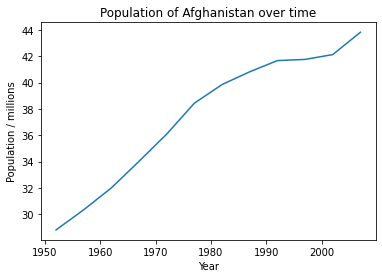

In [57]:
from matplotlib import pyplot as plt
plt.plot(afg.lifeExp)

# We should probably label our axes
plt.xlabel("Year")
plt.ylabel("Population / millions")
plt.title("Population of Afghanistan over time")

# Selecting columns

Selecting individual columns is easy with pandas. Here we select population data only. Because we set `year` as our ***index*** when importing the data, we continue to keep year labels on our data. 

In [60]:
population = df[["country", "population"]]
population

country  population
year                         
1952  Afghanistan     8425333
1957  Afghanistan     9240934
1962  Afghanistan    10267083
1967  Afghanistan    11537966
1972  Afghanistan    13079460
...           ...         ...
1987     Zimbabwe     9216418
1992     Zimbabwe    10704340
1997     Zimbabwe    11404948
2002     Zimbabwe    11926563
2007     Zimbabwe    12311143

[1704 rows x 2 columns]

Let's break down what is happening here. We are indexing our DataFrame using a `list` of column names.

In [62]:
names = ["country", "population"]
population2 = df[names]
population2

country  population
year                         
1952  Afghanistan     8425333
1957  Afghanistan     9240934
1962  Afghanistan    10267083
1967  Afghanistan    11537966
1972  Afghanistan    13079460
...           ...         ...
1987     Zimbabwe     9216418
1992     Zimbabwe    10704340
1997     Zimbabwe    11404948
2002     Zimbabwe    11926563
2007     Zimbabwe    12311143

[1704 rows x 2 columns]

# Combining row and column selections

Now suppose we only want population data from Asian countries. 
We can combine the two previous steps to select this subset of the data.


In [ ]:
asiapop = df.loc[df['continent'] == 'Asia'][['country', 'population']]
asiapop

# A slightly more complicated plot

We may want to plot the change in population over time for all Asian countries. 
To do this we will use another plotting library called [seaborn](https://seaborn.pydata.org/). This produces slightly better looking graphs, but is based on the same basic framework (matplotlib/pyplot).

At the core is the `sns.lineplot()` function, but there are additional lines of code to import, set up the figure, and modify the text on the figure.

Text(0.5, 1.0, 'Asian countries population over time')

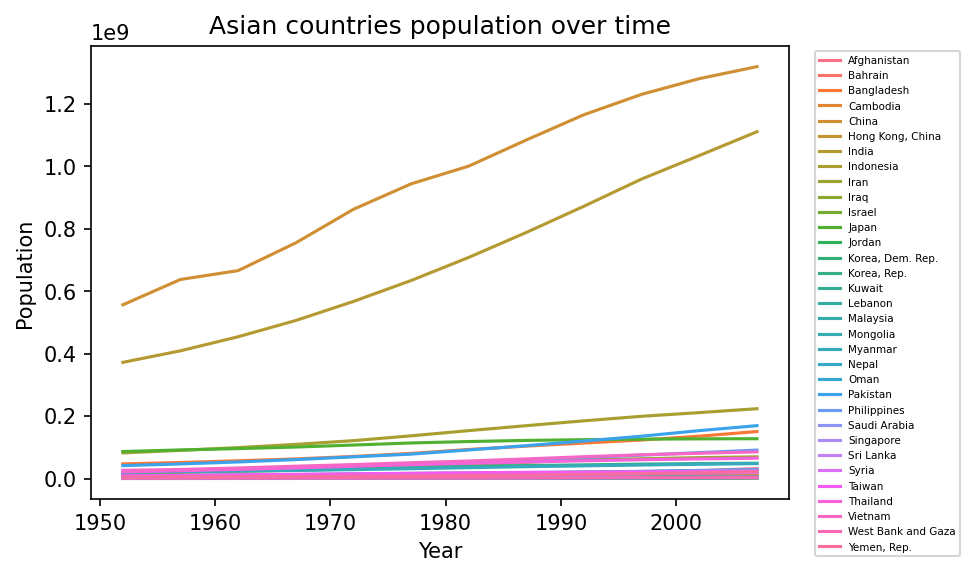

In [82]:
import seaborn as sns                # plotting pretty graphs

plt.figure(dpi=150) # Make a new figure and set the resolution

sns.lineplot(x=asiapop.index, y='population', hue='country', data=asiapop)

# Make legend font smaller and move to one side
plt.legend(fontsize=5, bbox_to_anchor= (1.03, 1))

# Set axis labels and title
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Asian countries population over time")

This gives us a clear indication of how the population has changed over time in India and China, however the remaining lines are overlapping. Try modifying the **previous** code block to change the y axis scale to logarithmic. 

Hint:

In [86]:
# Print the documentation for the `plt.yscale` function
print(plt.yscale.__doc__)


        Set the y-axis scale.

        Parameters
        ----------
        value : {"linear", "log", "symlog", "logit", ...}
            The axis scale type to apply.

        **kwargs
            Different keyword arguments are accepted, depending on the scale.
            See the respective class keyword arguments:

            - `matplotlib.scale.LinearScale`
            - `matplotlib.scale.LogScale`
            - `matplotlib.scale.SymmetricalLogScale`
            - `matplotlib.scale.LogitScale`

        Notes
        -----
        By default, Matplotlib supports the above mentioned scales.
        Additionally, custom scales may be registered using
        `matplotlib.scale.register_scale`. These scales can then also
        be used here.
        


# Making new columns / performing operations on data

Suppose we have to process our data in some way. Imagine that there is an arbitrary development index (ADI) that has the formula:

`Arbitrary Development Index = (Life expectancy^2 + GDP per capita) / 17` 

We can make a new column from the existing columns in our DataFrame. You will see that this has been appended on the right of the table. 

In [87]:
df['developIndex'] = (df['lifeExp']**2 + df['gdpPercap']) / 17

df

country continent  lifeExp  population   gdpPercap  developIndex
year                                                                      
1952  Afghanistan      Asia   28.801     8425333  779.445314     94.643701
1957  Afghanistan      Asia   30.332     9240934  820.853030    102.404897
1962  Afghanistan      Asia   31.997    10267083  853.100710    110.406395
1967  Afghanistan      Asia   34.020    11537966  836.197138    117.268090
1972  Afghanistan      Asia   36.088    13079460  739.981106    120.136756
...           ...       ...      ...         ...         ...           ...
1987     Zimbabwe    Africa   62.351     9216418  706.157306    270.223795
1992     Zimbabwe    Africa   60.377    10704340  693.420786    255.223701
1997     Zimbabwe    Africa   46.809    11404948  792.449960    175.501908
2002     Zimbabwe    Africa   39.989    11926563  672.038623    133.597573
2007     Zimbabwe    Africa   43.487    12311143  469.709298    138.872263

[1704 rows x 6 columns]

# Grouping data

Suppose we want to group our data by continent, and find the mean value of each of our metrics for each continent in the year 2007.

First we need to select the rows corresponding to year 2007. Year is our index for this dataframe so this is pretty easy using the .loc function.

Note that because the index is numerical in this case, we give a raw number as our index and not a string.



In [88]:
df2007 = df.loc[2007]
df2007

country continent  ...     gdpPercap  developIndex
year                                ...                            
2007         Afghanistan      Asia  ...    974.580338    170.321995
2007             Albania    Europe  ...   5937.029526    692.794380
2007             Algeria    Africa  ...   6223.367465    673.576592
2007              Angola    Africa  ...   4797.231267    389.598213
2007           Argentina  Americas  ...  12779.379640   1085.440120
...                  ...       ...  ...           ...           ...
2007             Vietnam      Asia  ...   2441.576404    467.911200
2007  West Bank and Gaza      Asia  ...   3025.349798    495.067052
2007         Yemen, Rep.      Asia  ...   2280.769906    365.400536
2007              Zambia    Africa  ...   1271.211593    180.447944
2007            Zimbabwe    Africa  ...    469.709298    138.872263

[142 rows x 6 columns]


Then, we group by continent using the groupby() command. Here we've grouped our data from year 2007 and called the function that generates descriptive statistics to summarize the data - generating count, mean, standard deviation and percentiles for each group (continent).

In [91]:
df2007.groupby('continent').describe()

lifeExp                       ... developIndex                          
            count       mean       std  ...          50%          75%          max
continent                               ...                                       
Africa       52.0  54.806038  9.630781  ...   255.500227   390.626329  1030.964564
Americas     25.0  73.608120  4.440948  ...   841.536054  1046.073705  2886.674333
Asia         33.0  70.728485  7.963724  ...   569.513679  1649.270734  3149.335319
Europe       30.0  77.648600  2.979813  ...  2026.862852  2370.726279  3281.681682
Oceania       2.0  80.719500  0.729027  ...  2136.828923  2275.311305  2413.793686

[5 rows x 32 columns]

If we were only interested in the mean values for each continent, we could use the `mean()` function.

In [95]:
df2007.groupby('continent').mean()

lifeExp    population     gdpPercap  developIndex
continent                                                     
Africa     54.806038  1.787576e+07   3089.032605    363.747218
Americas   73.608120  3.595485e+07  11003.031625    967.065888
Asia       70.728485  1.155138e+08  12473.026870   1031.590853
Europe     77.648600  1.953662e+07  25054.481636   1828.962943
Oceania    80.719500  1.227497e+07  29810.188275   2136.828923

# Putting the data in context

What we have done so far may be all you need for a clinical audit. For most audits you will need to:
- import data
- clean up data
- select parts of data
- group data
- perform basic statistics

But after this, you will want to visually represent your findings. **This is not a comprehensive tutorial**, but let's take a moment to generate some eye-candy :D

# Generating figures using code

One commonly used toolkit is `matplotlib`, which we imported earlier. Here are some tutorials for matplotlib: https://matplotlib.org/3.1.1/tutorials/index.html

Another one that builds on top of `matplotlib` and is capable of more sophisticated (and PRETTY) graphing is `seaborn`, which has a tutorial here: https://elitedatascience.com/python-seaborn-tutorial

But let's do a quick taster ourselves:

First of all, let's plot the relationship between GDP and life expectancy for values from 2007 - we can make the size of the points represent the population of each country, and colour code them according to continent.

For each command from these toolkits, there is generally a corresponding documentation page detailing the options, with examples of usage. For the `sns.scatterplot()` command, the documentation is found at https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0.5, 1.0, 'Four variables - hue, size, x and y')

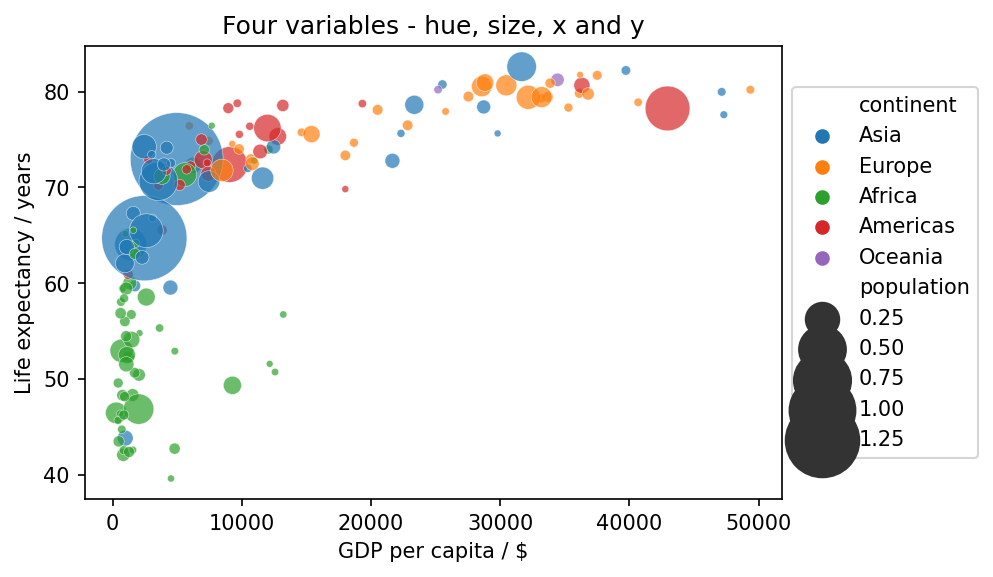

In [104]:
plt.figure(dpi=150)

# Call the seaborn scatterplot() function to generate a graph
sns.scatterplot(x='gdpPercap', y='lifeExp', size='population'
                , hue='continent', data=df2007, sizes=(10, 3000)
                , size_norm=(1, 2000000000), alpha=0.7)

# I've split the function call over multiple lines instead of 
# one very long one to make it more readable.


# configure legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("GDP per capita / $")
plt.ylabel("Life expectancy / years")
plt.title("Four variables - hue, size, x and y")

That's cool! Can you identify China, India and the USA?

## Iteratively generating multiple plots

What about the data from different time points?

We can write a **loop** - a command that repeatedly executes some code under a certain set of conditions, to generate a separate graph for data from each year. In this case we have used a `for` loop.

Don't worry too much about the details of the code, this is intended to illustrate broad concepts. Here is a [full tutorial](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) for using `plt.subplots`.

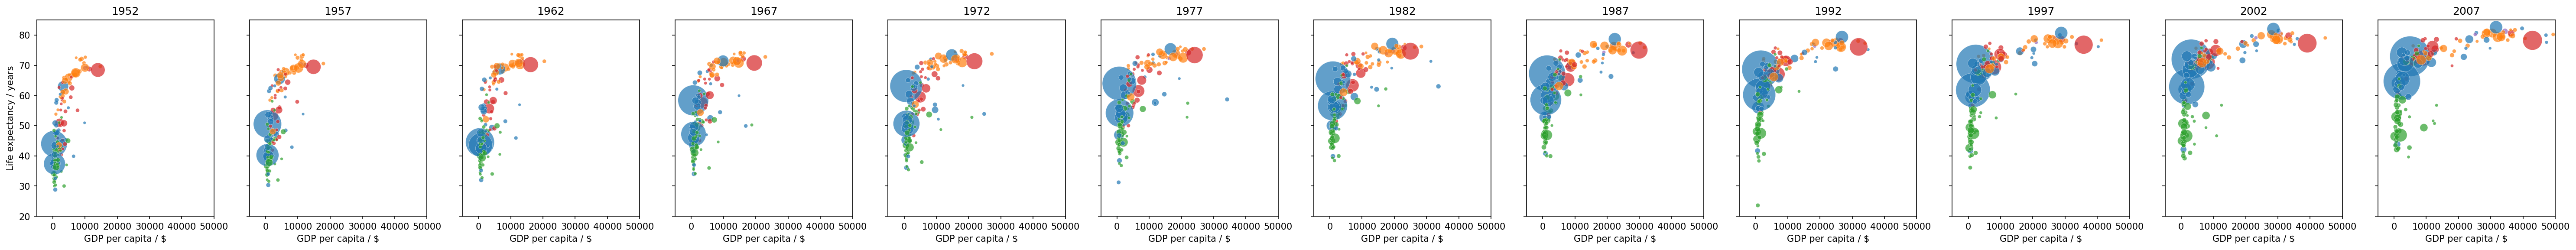

In [120]:
# Make a list of the unique years in this dataset
years = df.index.unique()

# Call the pyplot subplots() function to generate a grid of plots
fig, ax = plt.subplots(1, len(years), figsize=(50,4), sharey=True)
fig.set_dpi(150)
flatax = ax.flatten()

# Loop through the unique years in this dataset
for i, year in enumerate(years):
  
  # select only the data corresponding to this time point
  dfyear = df.loc[year]
  

  # Make a graph of the data for this timepoint
  s = sns.scatterplot(x='gdpPercap'
                      , y='lifeExp'
                      , size='population'
                      , hue='continent'
                      , data=dfyear
                      , sizes=(10, 3000)
                      , size_norm=(1, 2000000000)
                      , alpha=0.7
                      , ax=flatax[i])
    
  # Configure the x and y limits, remove the legend
  flatax[i].set_xlim(-5000,50000)
  flatax[i].set_ylim(20,85)
  flatax[i].set_title(year)
  s.legend().remove()

  flatax[i].set_xlabel("GDP per capita / $")
  flatax[i].set_ylabel("Life expectancy / years")

That's also pretty cool!

We can see some trends over time - life expectancy generally increases, and GDP per capita increases **markedly** for some countries but not others. 

But why stop there? Why not create an animation, and stitch all these graphs together to clearly show the change over time?

In [124]:
# Import some extra modules needed for animations
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

# Make a new figure
figani, ax = plt.subplots()
figani.set_dpi(150)
plt.close() # Don't show the static plot

# Function to generate the first frame of the animation
def init():
    dfstart = df.loc[1952]
    s = sns.scatterplot(x='gdpPercap'
                        , y='lifeExp'
                        , size='population'
                        , hue='continent'
                        , data=dfstart
                        , sizes=(10, 3000)
                        , size_norm=(1, 2000000000)
                        , alpha=0.7
                        , ax=ax)
    return s
    
# Function to generate the next frame of the animation
def animate(i):
    ax.clear()
    dfyear = df.loc[years[i]]
    s = sns.scatterplot(x='gdpPercap'
                        , y='lifeExp'
                        , size='population'
                        , hue='continent'
                        , data=dfyear
                        , sizes=(10, 3000)
                        , size_norm=(1, 2000000000)
                        , alpha=0.7
                        , ax=ax)
    ax.set(xlim=(-5000,50000)
           , ylim=(20,85)
           , title=years[i]
           , xlabel='GDP per capita / $'
           , ylabel='Life expectancy / years')
        
    s.legend().remove()
    return s


# Make a FuncAnimation object
anim = FuncAnimation(figani, animate, init_func=init, frames=len(years), interval=1000)

# Convert the FuncAnimation object to a video that is viewable in a web browser
HTML(anim.to_html5_video())

# Summary

Clearly, I have copied the concept from Hans Rosling, though perhaps one might quibble with their use of a logarithmic axis for GDP per capita... 
https://www.youtube.com/watch?v=jbkSRLYSojo

While there will be an initial learning curve, hopefully this illustrates the following advantages of generating graphs programmatically:
- Scalability - you can put in **very** large datasets without causing problems
- Flexibility - the same concepts you learn can be applied to other programming problems
- Generalisability - once you have code that analyses data in a certain way, you can apply similar analyses to different datasets
- Power - you can do some things using these tools that you just cannot otherwise
